In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime, warnings, scipy
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/content/flights_sample_3m.csv')
df.head(5)

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",...,0.0,186.0,176.0,153.0,1065.0,NaN,NaN,NaN,NaN,NaN
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",...,0.0,235.0,236.0,189.0,1399.0,NaN,NaN,NaN,NaN,NaN
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",...,0.0,118.0,112.0,87.0,680.0,NaN,NaN,NaN,NaN,NaN
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",...,0.0,260.0,285.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",...,0.0,181.0,182.0,153.0,985.0,NaN,NaN,NaN,NaN,NaN


In [3]:
df.tail(5)

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
2999995,2022-11-13,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,1522,JAX,"Jacksonville, FL",CLT,"Charlotte, NC",...,0.0,85.0,71.0,55.0,328.0,NaN,NaN,NaN,NaN,NaN
2999996,2022-11-02,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,1535,ORD,"Chicago, IL",AUS,"Austin, TX",...,0.0,176.0,145.0,130.0,977.0,NaN,NaN,NaN,NaN,NaN
2999997,2022-09-11,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2745,HSV,"Huntsville, AL",ATL,"Atlanta, GA",...,0.0,55.0,50.0,28.0,151.0,0.0,36.0,0.0,0.0,0.0
2999998,2019-11-13,Republic Airline,Republic Airline: YX,YX,20452,6134,BOS,"Boston, MA",LGA,"New York, NY",...,0.0,88.0,77.0,50.0,184.0,NaN,NaN,NaN,NaN,NaN
2999999,2019-06-15,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,2823,LGB,"Long Beach, CA",SJC,"San Jose, CA",...,0.0,70.0,63.0,52.0,324.0,NaN,NaN,NaN,NaN,NaN


In [4]:
# Check dimension of dataset
df.shape
print("There are "+ str(df.shape[0]) +" rows and "+ str(df.shape[1]) +" columns from the flight dataset.")

There are 3000000 rows and 32 columns from the flight dataset.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 32 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   FL_DATE                  object 
 1   AIRLINE                  object 
 2   AIRLINE_DOT              object 
 3   AIRLINE_CODE             object 
 4   DOT_CODE                 int64  
 5   FL_NUMBER                int64  
 6   ORIGIN                   object 
 7   ORIGIN_CITY              object 
 8   DEST                     object 
 9   DEST_CITY                object 
 10  CRS_DEP_TIME             int64  
 11  DEP_TIME                 float64
 12  DEP_DELAY                float64
 13  TAXI_OUT                 float64
 14  WHEELS_OFF               float64
 15  WHEELS_ON                float64
 16  TAXI_IN                  float64
 17  CRS_ARR_TIME             int64  
 18  ARR_TIME                 float64
 19  ARR_DELAY                float64
 20  CANCELLED                float64
 21  CANCELLA

Description of each column in dataset

**FL_DATE**: The date of the flight.

**AIRLINE**: The name of the airline operating the flight.

**AIRLINE_DOT**: Department of Transportation (DOT) identifier for the airline.

**AIRLINE_CODE**: IATA code for the airline.

**DOT_CODE**: Department of Transportation (DOT) code for the airline.
FL_NUMBER: Flight number.

**ORIGIN**: The origin airport code.

**ORIGIN_CITY**: The city of the origin airport.

**DEST**: The destination airport code.

**DEST_CITY**: The city of the destination airport.

**CRS_DEP_TIME**: Scheduled departure time.

**DEP_TIME**: Actual departure time.

**DEP_DELAY**: Delay in departure time.

**TAXI_OUT**: Time taken for taxi out.

**WHEELS_OFF**: Time when the aircraft leaves the ground.

**WHEELS_ON**: Time when the aircraft touches the ground.

**TAXI_IN**: Time taken for taxi in.

**CRS_ARR_TIME**: Scheduled arrival time.

**ARR_TIME**: Actual arrival time.

**ARR_DELAY**: Delay in arrival time.

**CANCELLED**: Indicates if the flight was cancelled.

**CANCELLATION_CODE**: Code for the reason of cancellation.

**DIVERTED**: Indicates if the flight was diverted.

**CRS_ELAPSED_TIME**: Scheduled elapsed time of the flight.

**ELAPSED_TIME**: Actual elapsed time of the flight.

**AIR_TIME**: Time spent in the air.

**DISTANCE**: Distance traveled by the flight.

**DELAY_DUE_CARRIER**: Delay attributed to the carrier.

**DELAY_DUE_WEATHER**: Delay attributed to weather conditions.

**DELAY_DUE_NAS**: Delay attributed to National Airspace System (NAS) issues.

**DELAY_DUE_SECURITY**: Delay attributed to security reasons.

**DELAY_DUE_LATE_AIRCRAFT**: Delay attributed to late arrival of the aircraft.

In [6]:
df['FL_DATE'] =  pd.to_datetime(df['FL_DATE'], format='%Y-%m-%d')
print(df['FL_DATE'].head())

0   2019-01-09
1   2022-11-19
2   2022-07-22
3   2023-03-06
4   2020-02-23
Name: FL_DATE, dtype: datetime64[ns]


In [7]:
# Count the number of cancelled flights
cancelled_count = df[df['CANCELLED'] == 1].shape[0]

# Print the count of cancelled flights
print("Count of cancelled flights:", cancelled_count)

Count of cancelled flights: 79140


In [8]:
df = df.drop(df[df.CANCELLED == True].index)
# Count the number of cancelled flights
cancelled_count = df[df['CANCELLED'] == 1].shape[0]

# Print the count of cancelled flights
print("Count of cancelled flights:", cancelled_count)

Count of cancelled flights: 0


In [9]:
# Count the number of DIVERTED flights
diverted_count = df[df['DIVERTED'] == 1].shape[0]

# Print the count of DIVERTED flights
print("Count of Diverted flights:", diverted_count)

Count of Diverted flights: 7056


In [10]:
df = df.drop(df[df.DIVERTED == True].index)
# Count the number of DIVERTED flights
diverted_count = df[df['DIVERTED'] == 1].shape[0]

# Print the count of DIVERTED flights
print("Count of Diverted flights:", diverted_count)

Count of Diverted flights: 0


In [11]:
df.isna().sum().sort_values(ascending=False)

CANCELLATION_CODE          2913804
DELAY_DUE_LATE_AIRCRAFT    2379941
DELAY_DUE_SECURITY         2379941
DELAY_DUE_NAS              2379941
DELAY_DUE_WEATHER          2379941
DELAY_DUE_CARRIER          2379941
WHEELS_ON                        2
AIR_TIME                         2
ELAPSED_TIME                     2
ARR_DELAY                        2
ARR_TIME                         2
TAXI_IN                          2
DEP_DELAY                        0
TAXI_OUT                         0
AIRLINE_DOT                      0
AIRLINE_CODE                     0
DOT_CODE                         0
FL_NUMBER                        0
DISTANCE                         0
ORIGIN                           0
ORIGIN_CITY                      0
CRS_ELAPSED_TIME                 0
DIVERTED                         0
DEST                             0
CANCELLED                        0
DEST_CITY                        0
CRS_DEP_TIME                     0
CRS_ARR_TIME                     0
AIRLINE             

In [12]:
# Drop columns with high missing values
columns_to_drop = ['CANCELLATION_CODE', 'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER',
                   'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT']
df = df.drop(columns=columns_to_drop)

In [13]:
# Drop rows with missing values for columns with low missing values
df = df.dropna(subset=['WHEELS_ON', 'TAXI_IN', 'ARR_TIME', 'ARR_DELAY', 'ELAPSED_TIME', 'AIR_TIME'])

In [14]:
df.isna().sum()

FL_DATE             0
AIRLINE             0
AIRLINE_DOT         0
AIRLINE_CODE        0
DOT_CODE            0
FL_NUMBER           0
ORIGIN              0
ORIGIN_CITY         0
DEST                0
DEST_CITY           0
CRS_DEP_TIME        0
DEP_TIME            0
DEP_DELAY           0
TAXI_OUT            0
WHEELS_OFF          0
WHEELS_ON           0
TAXI_IN             0
CRS_ARR_TIME        0
ARR_TIME            0
ARR_DELAY           0
CANCELLED           0
DIVERTED            0
CRS_ELAPSED_TIME    0
ELAPSED_TIME        0
AIR_TIME            0
DISTANCE            0
dtype: int64

EDA

In [15]:
status = []

for value in df['ARR_DELAY']:
    if value <= 10:
        status.append(0)
    else:
        status.append(1)
df['FLIGHT_STATUS'] = status

In [16]:
df_category = df.select_dtypes(include=['object','category'])
df_numerical = df.select_dtypes(exclude=['object'])

[Text(0.5, 0, 'Number of counts')]

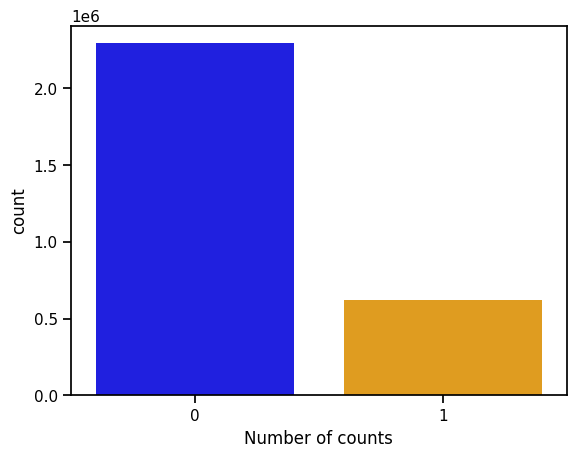

In [17]:
# Output Barplot showing the occurence of flight outcome
palette_colors = {'0': 'blue', '1': 'orange'}
sb.set_context("notebook")
g=sb.countplot(x="FLIGHT_STATUS",data=df,palette=palette_colors)
g.set(xlabel="Number of counts")

In [18]:
df['FLIGHT_STATUS'].value_counts()

FLIGHT_STATUS
0    2293863
1     619939
Name: count, dtype: int64

In [19]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [20]:
print(df.dtypes)

FL_DATE             datetime64[ns]
AIRLINE                     object
AIRLINE_DOT                 object
AIRLINE_CODE                object
DOT_CODE                     int64
FL_NUMBER                    int64
ORIGIN                      object
ORIGIN_CITY                 object
DEST                        object
DEST_CITY                   object
CRS_DEP_TIME                 int64
DEP_TIME                   float64
DEP_DELAY                  float64
TAXI_OUT                   float64
WHEELS_OFF                 float64
WHEELS_ON                  float64
TAXI_IN                    float64
CRS_ARR_TIME                 int64
ARR_TIME                   float64
ARR_DELAY                  float64
CANCELLED                  float64
DIVERTED                   float64
CRS_ELAPSED_TIME           float64
ELAPSED_TIME               float64
AIR_TIME                   float64
DISTANCE                   float64
FLIGHT_STATUS                int64
dtype: object


[Text(0.5, 0, 'Number of counts')]

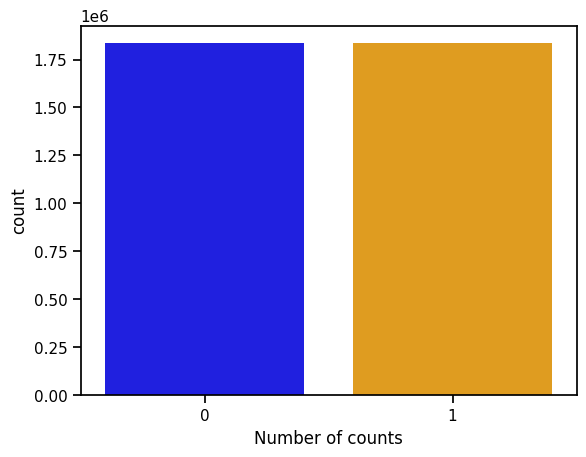

In [21]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = df.drop(['FL_DATE', 'FLIGHT_STATUS'], axis=1)  # Dropping FL_DATE assuming it's not used for modeling
y = df['FLIGHT_STATUS']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Resample the training dataset
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Concatenate resampled features and target variable
df_resampled = pd.concat([X_train_resampled, y_train_resampled], axis=1)

# Plot the balanced data
g = sb.countplot(x="FLIGHT_STATUS", data=df_resampled, palette=palette_colors)
g.set(xlabel="Number of counts")


In [22]:
df_resampled['FLIGHT_STATUS'].value_counts()

FLIGHT_STATUS
0    1834838
1    1834838
Name: count, dtype: int64

[Text(0.5, 0, 'Number of counts')]

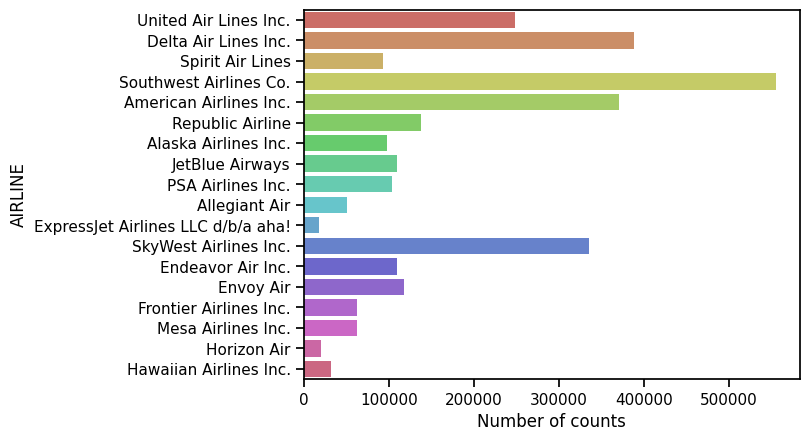

In [23]:
import seaborn as sb

# Set the context to notebook
sb.set_context("notebook")

# Define a custom palette for colors
custom_palette = sb.color_palette("hls", n_colors=len(df_resampled['AIRLINE'].unique()))

# Create the countplot with the specified palette
g = sb.countplot(y="AIRLINE", data=df_category, palette=custom_palette)
g.set(xlabel="Number of counts")

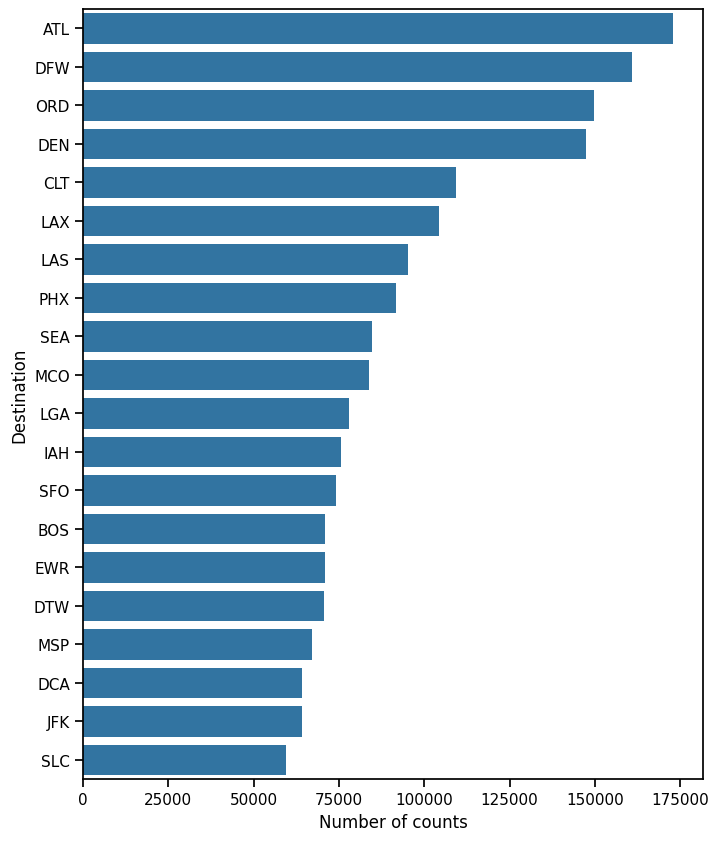

In [24]:
import seaborn as sb
import matplotlib.pyplot as plt

# Set the context to notebook
sb.set_context("notebook")

# Get the top 20 destinations with the highest number of counts
top_destinations = df_resampled['DEST'].value_counts().nlargest(20).index

# Filter the DataFrame to include only the top 20 destinations
df_top_destinations = df_resampled[df_resampled['DEST'].isin(top_destinations)]

# Calculate the number of unique destinations in the top 20
num_destinations = len(top_destinations)

# Calculate the figure size based on the number of unique destinations
fig_height = max(0.5 * num_destinations, 6)  # Adjust the multiplier as needed
plt.figure(figsize=(8, fig_height))  # Adjust the width as needed

# Create the countplot for the top 20 destinations
g = sb.countplot(y="DEST", data=df_top_destinations, order=top_destinations)

# Set labels
g.set(xlabel="Number of counts", ylabel="Destination")

# Show the plot
plt.show()


<Axes: xlabel='ARR_DELAY', ylabel='DEP_DELAY'>

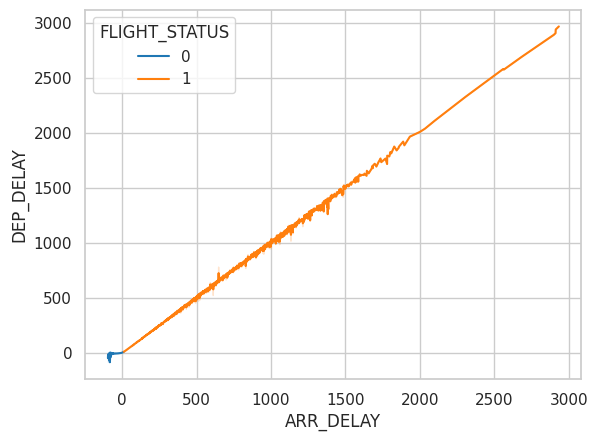

In [65]:
#Compare betwEen scheduled and actual arrival time
#sb.lineplot(data=df_resampled, x="ARR_DELAY", y="DEP_DELAY", hue="FLIGHT_STATUS")

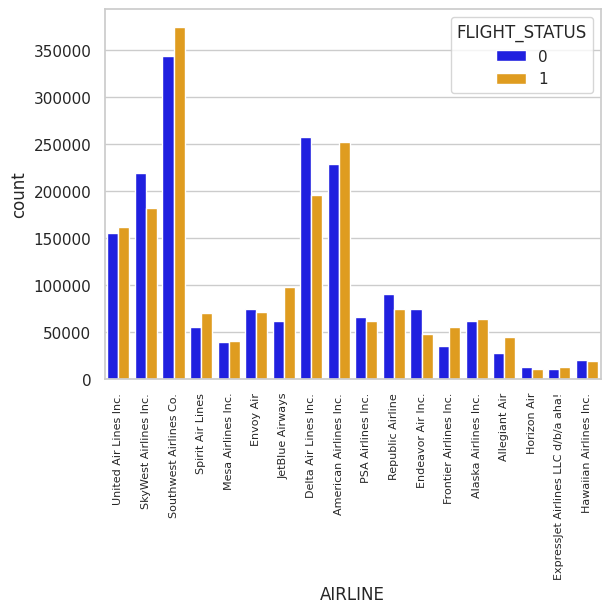

In [25]:
import seaborn as sb
import matplotlib.pyplot as plt

# Set the style to whitegrid
sb.set_style('whitegrid')

# Define a list of colors containing dark blue and red
colors = ["blue", "orange"]

# Create the countplot with the specified colors
ax = sb.countplot(x='AIRLINE', hue='FLIGHT_STATUS', data=df_resampled, palette=colors)

# Write the short form for each airline and rotate by 90 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=8)

# Show the plot
plt.show()


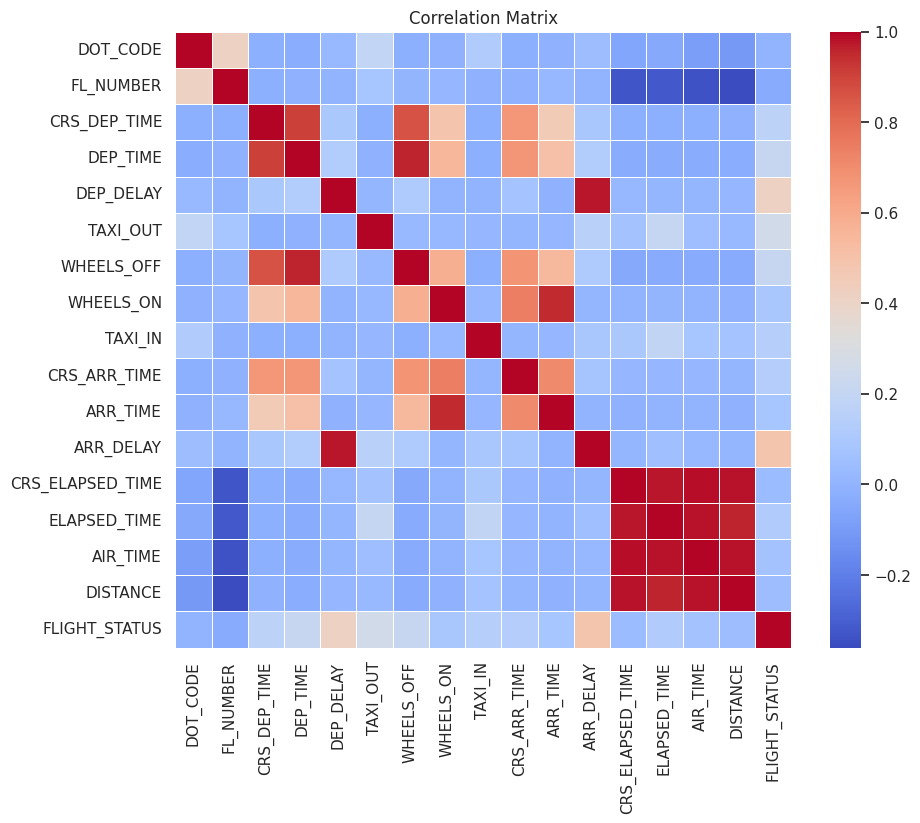

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns excluding "CANCELLED" and "DIVERTED"
numeric_columns = df_resampled.select_dtypes(include=['number']).drop(columns=["CANCELLED", "DIVERTED"])

# Compute the correlation matrix
corr = numeric_columns.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap without the mask and adjust aspect ratio
sns.heatmap(corr, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5, square=True)

plt.title('Correlation Matrix')
plt.show()


In [27]:
high_corr = corr[(corr > 0.9) & (corr < 1.0)]

# Get the column pairs with high positive correlation
high_corr_pairs = [(column1, column2, corr.loc[column1, column2]) for column1 in high_corr.columns for column2 in high_corr.index if high_corr.loc[column2, column1] > 0]

# Create a DataFrame to display the column pairs and their correlation values
high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Column 1', 'Column 2', 'Correlation'])
high_corr_df

,Column 1,Column 2,Correlation
0,CRS_DEP_TIME,DEP_TIME,0.904805
1,DEP_TIME,CRS_DEP_TIME,0.904805
2,DEP_TIME,WHEELS_OFF,0.958448
3,DEP_DELAY,ARR_DELAY,0.973513
4,WHEELS_OFF,DEP_TIME,0.958448
5,WHEELS_ON,ARR_TIME,0.950457
6,ARR_TIME,WHEELS_ON,0.950457
7,ARR_DELAY,DEP_DELAY,0.973513
8,CRS_ELAPSED_TIME,ELAPSED_TIME,0.974107
9,CRS_ELAPSED_TIME,AIR_TIME,0.987286


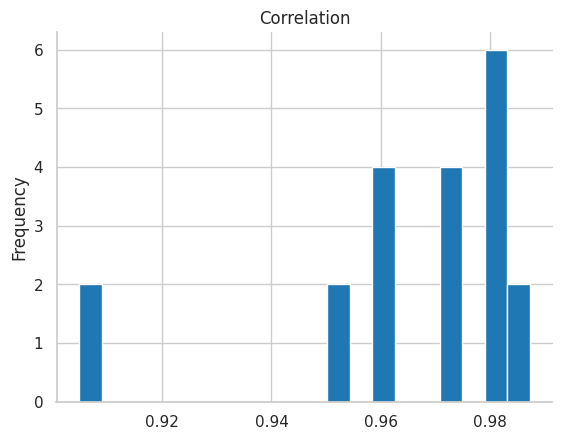

In [28]:
# @title Correlation

from matplotlib import pyplot as plt
high_corr_df['Correlation'].plot(kind='hist', bins=20, title='Correlation')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [29]:
df_resampled['ELAPSED_TIME_DIFF'] = df_resampled['ELAPSED_TIME'] - df_resampled['CRS_ELAPSED_TIME']

print(df_resampled[['CRS_ELAPSED_TIME', 'ELAPSED_TIME', 'ELAPSED_TIME_DIFF']])

         CRS_ELAPSED_TIME  ELAPSED_TIME  ELAPSED_TIME_DIFF
0                   142.0         125.0              -17.0
1                   100.0          89.0              -11.0
2                    70.0          69.0               -1.0
3                   154.0         150.0               -4.0
4                    95.0          92.0               -3.0
...                   ...           ...                ...
3669671             133.0         155.0               22.0
3669672             182.0         187.0                5.0
3669673              89.0          75.0              -14.0
3669674             195.0         210.0               15.0
3669675             270.0         282.0               12.0

[3669676 rows x 3 columns]


In [30]:
columns_to_drop = ['DEP_TIME','CRS_DEP_TIME','WHEELS_OFF','WHEELS_ON','DEP_DELAY','ARR_DELAY','ELAPSED_TIME','AIR_TIME','DISTANCE','CRS_ELAPSED_TIME']

df_resampled = df_resampled.drop(columns_to_drop, axis=1)

In [31]:
df_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3669676 entries, 0 to 3669675
Data columns (total 17 columns):
 #   Column             Dtype  
---  ------             -----  
 0   AIRLINE            object 
 1   AIRLINE_DOT        object 
 2   AIRLINE_CODE       object 
 3   DOT_CODE           int64  
 4   FL_NUMBER          int64  
 5   ORIGIN             object 
 6   ORIGIN_CITY        object 
 7   DEST               object 
 8   DEST_CITY          object 
 9   TAXI_OUT           float64
 10  TAXI_IN            float64
 11  CRS_ARR_TIME       int64  
 12  ARR_TIME           float64
 13  CANCELLED          float64
 14  DIVERTED           float64
 15  FLIGHT_STATUS      int64  
 16  ELAPSED_TIME_DIFF  float64
dtypes: float64(6), int64(4), object(7)
memory usage: 476.0+ MB


In [32]:
X = df_resampled.drop('FLIGHT_STATUS',axis=1)
Y = df_resampled['FLIGHT_STATUS']

In [33]:
# Splitting data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=50)

In [34]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((2568773, 16), (1100903, 16), (2568773,), (1100903,))

In [35]:
print("Train data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

Train data shape: (2568773, 16)
Test data shape: (1100903, 16)


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming 'data' is your DataFrame containing the features and target variable
# Drop non-numeric columns for simplicity
data_numeric = df_resampled.select_dtypes(include=['number'])

# Split data into features (X) and target variable (y)
X = data_numeric.drop(columns=['FLIGHT_STATUS'])
y = data_numeric['FLIGHT_STATUS']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a logistic regression model
log_reg = LogisticRegression()

# Fit the model on the training data
log_reg.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test_scaled)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.73      0.69    366448
           1       0.69      0.61      0.65    367488

    accuracy                           0.67    733936
   macro avg       0.67      0.67      0.67    733936
weighted avg       0.67      0.67      0.67    733936

Confusion Matrix:
[[267853  98595]
 [143529 223959]]


In [37]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN Classifier
knn_classifier = KNeighborsClassifier()

# Fit the model to the training data
knn_classifier.fit(X_train, y_train)

# Predict on the test data
knn_predictions = knn_classifier.predict(X_test)

# Classification report
print("K-Nearest Neighbors Classifier Report:")
print(classification_report(y_test, knn_predictions))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, knn_predictions))

K-Nearest Neighbors Classifier Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96    366448
           1       0.95      0.97      0.96    367488

    accuracy                           0.96    733936
   macro avg       0.96      0.96      0.96    733936
weighted avg       0.96      0.96      0.96    733936

Confusion Matrix:
[[348942  17506]
 [ 11022 356466]]


In [38]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier()

# Fit the model to the training data
gb_classifier.fit(X_train, y_train)

# Predict on the test data
gb_predictions = gb_classifier.predict(X_test)

# Classification report
print("Gradient Boosting Classifier Report:")
print(classification_report(y_test, gb_predictions))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, gb_predictions))

Gradient Boosting Classifier Report:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87    366448
           1       0.92      0.79      0.85    367488

    accuracy                           0.86    733936
   macro avg       0.87      0.86      0.86    733936
weighted avg       0.87      0.86      0.86    733936

Confusion Matrix:
[[342165  24283]
 [ 75653 291835]]


In [39]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Fit the model to the training data
rf_classifier.fit(X_train, y_train)

# Predict on the test data
rf_predictions = rf_classifier.predict(X_test)

# Classification report
print("Random Forest Classifier Report:")
print(classification_report(y_test, rf_predictions))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_predictions))


Random Forest Classifier Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    366448
           1       0.99      1.00      0.99    367488

    accuracy                           0.99    733936
   macro avg       0.99      0.99      0.99    733936
weighted avg       0.99      0.99      0.99    733936

Confusion Matrix:
[[361289   5159]
 [   758 366730]]
